I. Introduction

Social media is becoming a trends nowadays. Understanding the engagement in short-form media is crucial to have a good roadmap in increasing the popularity in social media. In this notebook, the aiming is finding the current trends, to interprete the most effective engagement metrics and to provide a good map to improve the efficiency and accurate in near future media plan.

II. Objectives

1. EDA the dataset (shorts_vs_tiktok)
2. Top 10 most engagemen profiles?
3. Top 10 hastags with most views?
4. Top 10 hastags with most likes?
5. Trend Identification & Analysis
    Objective: To identify the key trends in short-form video consumption across different countries and platforms.
    Expected outcome: A clear understanding of the most active and fastest-growing markets for short-form video.

6. Engagement Metrics Interpretation
    Objective: To determine which engagement metrics are most predictive of video popularity and virality.
    Expected outcome: An interpretation of which metrics (e.g., shares vs. likes) are the strongest indicators of a video's success, providing actionable insights for content creators.

7. Creator and Content Strategy
    Objective: To provide a data-driven roadmap for improving media efficiency and accuracy.
    Expected outcome: A set of actionable recommendations for a media plan, such as "Focus on content in [Category X] and collaborate with creators in the [Y Tier] to maximize engagement."

III. Preparation


In [168]:
## Import library
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

# Import my utils
from utils import *

# Set working directory
for pathname, dirname, filenames in os.walk('Dataset'):
    for filename in filenames:
        if filename.endswith('.csv'):
            print("Found csv file:", os.path.join(pathname, filename))

#Link dataset :https://www.kaggle.com/datasets/tarekmasryo/youtube-shorts-and-tiktok-trends-2025?select=DATA_DICTIONARY.csv


Found csv file: Dataset/monthly_trends_2025.csv
Found csv file: Dataset/youtube_shorts_tiktok_trends_2025.csv
Found csv file: Dataset/top_creators_impact_2025.csv
Found csv file: Dataset/country_platform_summary_2025.csv
Found csv file: Dataset/top_hashtags_2025.csv
Found csv file: Dataset/DATA_DICTIONARY.csv


In [169]:
# Load dataset
monthly_trends = pl.read_csv('Dataset/monthly_trends_2025.csv')
top_creators = pl.read_csv('Dataset/top_creators_impact_2025.csv')
top_hashtags = pl.read_csv('Dataset/top_hashtags_2025.csv')
shorts_vs_tiktok = pl.read_csv('Dataset/youtube_shorts_tiktok_trends_2025.csv')
platform_summary = pl.read_csv('Dataset/country_platform_summary_2025.csv')
Data_dictionary = pl.read_csv('Dataset/DATA_DICTIONARY.csv')


In [170]:
# Check null values
print("Null values in each dataset:")
display(monthly_trends.null_count().pipe(sum).item())
display(top_creators.null_count().pipe(sum).item())
display(top_hashtags.null_count().pipe(sum).item())
display(shorts_vs_tiktok.null_count().pipe(sum).item())
display(platform_summary.null_count().pipe(sum).item())
display(Data_dictionary.null_count().pipe(sum).item())
print("--- End of null value check ---\n")


Null values in each dataset:


0

0

0

0

0

0

--- End of null value check ---



The "DATA_DICTIONARY" includes various column names with their descriptions as follow:

In [171]:
# Display Dictionary
print("Data Dictionary:")
i = 1
for row in Data_dictionary.to_dicts():
    if i % 10 == 0:
        print('\n')
    print(f'{i}. Column "{row["column"]}" is "{row["description"]}"')
    i += 1
print("--- End of Data Dictionary ---")

Data Dictionary:
1. Column "platform" is "Platform (TikTok/YouTube)"
2. Column "country" is "Country ISO-2 code"
3. Column "region" is "Region macro label (if available)"
4. Column "language" is "Primary language inferred from country (fallback to 'en')"
5. Column "category" is "Video category (if available)"
6. Column "hashtag" is "Primary hashtag aligned with genre"
7. Column "title_keywords" is "Short realistic title-like keywords"
8. Column "author_handle" is "Creator handle/channel (brand-like, synthetic)"
9. Column "sound_type" is "Sound type (if present)"


10. Column "music_track" is "Music track (if present)"
11. Column "week_of_year" is "ISO week number (1‚Äì53)"
12. Column "duration_sec" is "Shorts-style duration in seconds (TikTok ~5‚Äì75, YouTube ~5‚Äì90)"
13. Column "views" is "Total views"
14. Column "likes" is "Likes count"
15. Column "comments" is "Comments count"
16. Column "shares" is "Shares count"
17. Column "saves" is "Saves count"
18. Column "engagement_rate" is 

In [172]:
# Display schema of each dataset
print("Schema of each dataset:")
print("Monthly Trends Schema:")
display(monthly_trends.schema)
print('Shape size: ', monthly_trends.shape)
print("------------------------------\n")
print("Top Creators Schema:")
display(top_creators.schema)
print('Shape size: ', top_creators.shape)
print("------------------------------\n")
print("Top Hashtags Schema:")
display(top_hashtags.schema)
print('Shape size: ', top_hashtags.shape)
print("------------------------------\n")
print("Shorts vs TikTok Schema:")
display(shorts_vs_tiktok.schema)
print('Shape size: ', shorts_vs_tiktok.shape)
print("------------------------------\n")
print("Platform Summary Schema:")
display(platform_summary.schema)
print('Shape size: ', platform_summary.shape)
print("--- End of schema display ---\n")


Schema of each dataset:
Monthly Trends Schema:


Schema([('country', String),
        ('platform', String),
        ('year_month', String),
        ('n_videos', Int64),
        ('views', Int64),
        ('avg_er', Float64),
        ('avg_velocity', Float64),
        ('trend_label', String)])

Shape size:  (480, 8)
------------------------------

Top Creators Schema:


Schema([('author_handle', String),
        ('platform', String),
        ('n_videos', Int64),
        ('views', Int64),
        ('avg_er', Float64),
        ('likes_sum', Int64),
        ('dislikes_sum', Int64),
        ('comments_sum', Int64),
        ('shares_sum', Int64),
        ('saves_sum', Int64),
        ('total_engagements', Int64),
        ('avg_engagement_velocity', Float64),
        ('avg_comment_ratio', Float64),
        ('avg_share_rate', Float64),
        ('avg_save_rate', Float64),
        ('avg_like_dislike_ratio', Float64),
        ('avg_engagement_per_1k', Float64),
        ('avg_like_rate', Float64),
        ('avg_dislike_rate', Float64),
        ('creator_avg_views', Float64)])

Shape size:  (1000, 20)
------------------------------

Top Hashtags Schema:


Schema([('platform', String),
        ('hashtag', String),
        ('n_videos', Int64),
        ('views', Int64),
        ('likes', Int64),
        ('comments', Int64),
        ('shares', Int64),
        ('saves', Int64),
        ('avg_er', Float64),
        ('avg_engagement_velocity', Float64),
        ('avg_comment_ratio', Float64),
        ('avg_share_rate', Float64),
        ('avg_save_rate', Float64),
        ('avg_like_dislike_ratio', Float64),
        ('avg_engagement_per_1k', Float64),
        ('avg_like_rate', Float64),
        ('avg_dislike_rate', Float64),
        ('total_engagements', Int64)])

Shape size:  (82, 18)
------------------------------

Shorts vs TikTok Schema:


Schema([('platform', String),
        ('country', String),
        ('region', String),
        ('language', String),
        ('category', String),
        ('hashtag', String),
        ('title_keywords', String),
        ('author_handle', String),
        ('sound_type', String),
        ('music_track', String),
        ('week_of_year', Int64),
        ('duration_sec', Int64),
        ('views', Int64),
        ('likes', Int64),
        ('comments', Int64),
        ('shares', Int64),
        ('saves', Int64),
        ('engagement_rate', Float64),
        ('trend_label', String),
        ('source_hint', String),
        ('notes', String),
        ('device_type', String),
        ('upload_hour', Int64),
        ('genre', String),
        ('trend_duration_days', Int64),
        ('trend_type', String),
        ('engagement_velocity', Float64),
        ('dislikes', Int64),
        ('comment_ratio', Float64),
        ('share_rate', Float64),
        ('save_rate', Float64),
        ('like_dislik

Shape size:  (48079, 58)
------------------------------

Platform Summary Schema:


Schema([('country', String),
        ('platform', String),
        ('total_videos', Int64),
        ('total_views', Int64),
        ('median_er', Float64),
        ('p95_views', Float64),
        ('avg_duration', Float64),
        ('avg_velocity', Float64),
        ('avg_comment_ratio', Float64),
        ('avg_share_rate', Float64),
        ('avg_save_rate', Float64),
        ('avg_engagement_per_1k', Float64),
        ('top_hashtag', String),
        ('top_hashtag_views', Int64)])

Shape size:  (60, 14)
--- End of schema display ---



In [173]:
# Display first few rows of each dataset
print("First few rows of each dataset:")
display(monthly_trends.head(3))
display(top_creators.head(3))
display(top_hashtags.head(3))
display(shorts_vs_tiktok.head(3))
display(platform_summary.head(3))
print("--- End of dataset preview ---\n")


First few rows of each dataset:


shape: (3, 8)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ country ‚îÜ platform ‚îÜ year_month ‚îÜ n_videos ‚îÜ views    ‚îÜ avg_er   ‚îÜ avg_velocity ‚îÜ trend_label ‚îÇ
‚îÇ ---     ‚îÜ ---      ‚îÜ ---        ‚îÜ ---      ‚îÜ ---      ‚îÜ ---      ‚îÜ ---          ‚îÜ ---         ‚îÇ
‚îÇ str     ‚îÜ str      ‚îÜ str        ‚îÜ i64      ‚îÜ i64      ‚îÜ f64      ‚îÜ f64          ‚îÜ str         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ AE      ‚îÜ TikTok   ‚îÜ 2025-01    ‚îÜ 130      ‚îÜ 14474636 ‚îÜ 0.093197 ‚îÜ 18357.548923 ‚îÜ steady      ‚îÇ
‚îÇ AE      ‚îÜ TikTok   ‚îÜ 2025-02    ‚îÜ 112      ‚îÜ 11873208 ‚îÜ 0.092006 ‚îÜ 14471.823839 ‚îÜ declining   ‚îÇ
‚îÇ AE      ‚îÜ TikTok   ‚îÜ 2025-03    ‚îÜ 129      ‚îÜ 15551725 ‚îÜ 0.088624 ‚îÜ 15883.138605 ‚îÜ rising      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (3, 20)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ author_han ‚îÜ platform ‚îÜ n_videos ‚îÜ views    ‚îÜ ‚Ä¶ ‚îÜ avg_engage ‚îÜ avg_like_ ‚îÜ avg_disli ‚îÜ creator_a ‚îÇ
‚îÇ dle        ‚îÜ ---      ‚îÜ ---      ‚îÜ ---      ‚îÜ   ‚îÜ ment_per_1 ‚îÜ rate      ‚îÜ ke_rate   ‚îÜ vg_views  ‚îÇ
‚îÇ ---        ‚îÜ str      ‚îÜ i64      ‚îÜ i64      ‚îÜ   ‚îÜ k          ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ str        ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ ---        ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ f64        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ UrbanVisio ‚îÜ TikTok   ‚îÜ 136      ‚îÜ 17938952 ‚îÜ ‚Ä¶ ‚îÜ 91.913699  ‚îÜ 0.070115  ‚îÜ 0.001887  ‚îÜ 120866.4  ‚îÇ
‚îÇ n          ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ BeyondStud ‚îÜ TikTok   ‚îÜ 135      ‚îÜ 17085072 ‚îÜ ‚Ä¶ ‚îÜ 87.915533  ‚îÜ 0.067256  ‚îÜ 0.001922  ‚îÜ 116192.9  ‚îÇ
‚îÇ io         ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ StreetVisi ‚îÜ TikTok   ‚îÜ 133      ‚îÜ 16843324 ‚îÜ ‚Ä¶ ‚îÜ 93.018098  ‚îÜ 0.071123  ‚îÜ 0.00187   ‚îÜ 116083.5  ‚îÇ
‚îÇ on         ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (3, 18)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ platform ‚îÜ hashtag ‚îÜ n_videos ‚îÜ views     ‚îÜ ‚Ä¶ ‚îÜ avg_engage ‚îÜ avg_like_r ‚îÜ avg_dislik ‚îÜ total_eng ‚îÇ
‚îÇ ---      ‚îÜ ---     ‚îÜ ---      ‚îÜ ---       ‚îÜ   ‚îÜ ment_per_1 ‚îÜ ate        ‚îÜ e_rate     ‚îÜ agements  ‚îÇ
‚îÇ str      ‚îÜ str     ‚îÜ i64      ‚îÜ i64       ‚îÜ   ‚îÜ k          ‚îÜ ---        ‚îÜ ---        ‚îÜ ---       ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ ---        ‚îÜ f64        ‚îÜ f64        ‚îÜ i64       ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ f64        ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ TikTok   ‚îÜ #FYP    ‚îÜ 7379     ‚îÜ 734064265 ‚îÜ ‚Ä¶ ‚îÜ 91.837843  ‚îÜ 0.070141   ‚îÜ 0.001892   ‚îÜ 67400639  ‚îÇ
‚îÇ TikTok   ‚îÜ #GRWM   ‚îÜ 1013     ‚îÜ 111331419 ‚îÜ ‚Ä¶ ‚îÜ 91.319729  ‚îÜ 0.069833   ‚îÜ 0.001921   ‚îÜ 10099811  ‚îÇ
‚îÇ TikTok   ‚îÜ #Comedy ‚îÜ 762      ‚îÜ 79538424  ‚îÜ ‚Ä¶ ‚îÜ 92.76152   ‚îÜ 0.070627   ‚îÜ 0.001941   ‚îÜ 7528432   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (3, 58)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ platform ‚îÜ country ‚îÜ region ‚îÜ language ‚îÜ ‚Ä¶ ‚îÜ engagement_ ‚îÜ engagement_ ‚îÜ engagement ‚îÜ engagement ‚îÇ
‚îÇ ---      ‚îÜ ---     ‚îÜ ---    ‚îÜ ---      ‚îÜ   ‚îÜ per_1k      ‚îÜ like_rate   ‚îÜ _comment_r ‚îÜ _share_rat ‚îÇ
‚îÇ str      ‚îÜ str     ‚îÜ str    ‚îÜ str      ‚îÜ   ‚îÜ ---         ‚îÜ ---         ‚îÜ ate        ‚îÜ e          ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ        ‚îÜ          ‚îÜ   ‚îÜ f64         ‚îÜ f64         ‚îÜ ---        ‚îÜ ---        ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ        ‚îÜ          ‚îÜ   ‚îÜ             ‚îÜ             ‚îÜ f64        ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ TikTok   ‚îÜ Jp      ‚îÜ Asia   ‚îÜ ja       ‚îÜ ‚Ä¶ ‚îÜ 120.069     ‚îÜ 0.086159    ‚îÜ 0.012555   ‚îÜ 0.00783    ‚îÇ
‚îÇ TikTok   ‚îÜ Se      ‚îÜ Europe ‚îÜ sv       ‚îÜ ‚Ä¶ ‚îÜ 113.005     ‚îÜ 0.085298    ‚îÜ 0.00785    ‚îÜ 0.007791   ‚îÇ
‚îÇ TikTok   ‚îÜ Za      ‚îÜ Africa ‚îÜ en       ‚îÜ ‚Ä¶ ‚îÜ 68.111      ‚îÜ 0.049154    ‚îÜ 0.004469   ‚îÜ 0.005146   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (3, 14)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ country ‚îÜ platform ‚îÜ total_vide ‚îÜ total_view ‚îÜ ‚Ä¶ ‚îÜ avg_save_ ‚îÜ avg_engag ‚îÜ top_hasht ‚îÜ top_hasht ‚îÇ
‚îÇ ---     ‚îÜ ---      ‚îÜ os         ‚îÜ s          ‚îÜ   ‚îÜ rate      ‚îÜ ement_per ‚îÜ ag        ‚îÜ ag_views  ‚îÇ
‚îÇ str     ‚îÜ str      ‚îÜ ---        ‚îÜ ---        ‚îÜ   ‚îÜ ---       ‚îÜ _1k       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ         ‚îÜ          ‚îÜ i64        ‚îÜ i64        ‚îÜ   ‚îÜ f64       ‚îÜ ---       ‚îÜ str       ‚îÜ i64       ‚îÇ
‚îÇ         ‚îÜ          ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ f64       ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Ae      ‚îÜ TikTok   ‚îÜ 1017       ‚îÜ 102064271  ‚îÜ ‚Ä¶ ‚îÜ 0.0072    ‚îÜ 92.4015   ‚îÜ #FYP      ‚îÜ 26292844  ‚îÇ
‚îÇ Ae      ‚îÜ YouTube  ‚îÜ 641        ‚îÜ 67638733   ‚îÜ ‚Ä¶ ‚îÜ 0.004     ‚îÜ 51.2265   ‚îÜ #FYP      ‚îÜ 18272805  ‚îÇ
‚îÇ Ar      ‚îÜ TikTok   ‚îÜ 1032       ‚îÜ 103715112  ‚îÜ ‚Ä¶ ‚îÜ 0.0071    ‚îÜ 90.0953   ‚îÜ #FYP      ‚îÜ 27220930  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

--- End of dataset preview ---



In [174]:
# Display summary statistics of each dataset
print("Summary statistics of each dataset:")
display(monthly_trends.describe())
display(top_creators.describe())
display(top_hashtags.describe())
display(shorts_vs_tiktok.describe())
display(platform_summary.describe())
print("--- End of summary statistics ---\n")


Summary statistics of each dataset:


shape: (9, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ country ‚îÜ platform ‚îÜ year_month ‚îÜ ‚Ä¶ ‚îÜ views      ‚îÜ avg_er   ‚îÜ avg_veloc ‚îÜ trend_lab ‚îÇ
‚îÇ ---        ‚îÜ ---     ‚îÜ ---      ‚îÜ ---        ‚îÜ   ‚îÜ ---        ‚îÜ ---      ‚îÜ ity       ‚îÜ el        ‚îÇ
‚îÇ str        ‚îÜ str     ‚îÜ str      ‚îÜ str        ‚îÜ   ‚îÜ f64        ‚îÜ f64      ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ f64       ‚îÜ str       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 480     ‚îÜ 480      ‚îÜ 480        ‚îÜ ‚Ä¶ ‚îÜ 480.0      ‚îÜ 480.0    ‚îÜ 480.0     ‚îÜ 480       ‚îÇ
‚îÇ null_count ‚îÜ 0       ‚îÜ 0        ‚îÜ 0          ‚îÜ ‚Ä¶ ‚îÜ 0.0        ‚îÜ 0.0      ‚îÜ 0.0       ‚îÜ 0         ‚îÇ
‚îÇ mean       ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 9.9456e6   ‚îÜ 0.071325 ‚îÜ 13827.294 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 022       ‚îÜ           ‚îÇ
‚îÇ std        ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 2.7228e6   ‚îÜ 0.020566 ‚îÜ 2576.2106 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 52        ‚îÜ           ‚îÇ
‚îÇ min        ‚îÜ AE      ‚îÜ TikTok   ‚îÜ 2025-01    ‚îÜ ‚Ä¶ ‚îÜ 4.402922e6 ‚îÜ 0.046267 ‚îÜ 8127.4235 ‚îÜ declining ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 16        ‚îÜ           ‚îÇ
‚îÇ 25%        ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 7.746645e6 ‚îÜ 0.050687 ‚îÜ 11922.079 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 773       ‚îÜ           ‚îÇ
‚îÇ 50%        ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 9.758886e6 ‚îÜ 0.085923 ‚îÜ 13520.303 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 509       ‚îÜ           ‚îÇ
‚îÇ 75%        ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 1.1892837e ‚îÜ 0.091783 ‚îÜ 15502.540 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ 7          ‚îÜ          ‚îÜ 476       ‚îÜ           ‚îÇ
‚îÇ max        ‚îÜ ZA      ‚îÜ YouTube  ‚îÜ 2025-08    ‚îÜ ‚Ä¶ ‚îÜ 1.8611773e ‚îÜ 0.096982 ‚îÜ 23553.853 ‚îÜ steady    ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ 7          ‚îÜ          ‚îÜ 889       ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 21)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic ‚îÜ author_ha ‚îÜ platform ‚îÜ n_videos  ‚îÜ ‚Ä¶ ‚îÜ avg_engag ‚îÜ avg_like_ ‚îÜ avg_disli ‚îÜ creator_a ‚îÇ
‚îÇ ---       ‚îÜ ndle      ‚îÜ ---      ‚îÜ ---       ‚îÜ   ‚îÜ ement_per ‚îÜ rate      ‚îÜ ke_rate   ‚îÜ vg_views  ‚îÇ
‚îÇ str       ‚îÜ ---       ‚îÜ str      ‚îÜ f64       ‚îÜ   ‚îÜ _1k       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ           ‚îÜ str       ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ ---       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ f64       ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count     ‚îÜ 1000      ‚îÜ 1000     ‚îÜ 1000.0    ‚îÜ ‚Ä¶ ‚îÜ 1000.0    ‚îÜ 1000.0    ‚îÜ 1000.0    ‚îÜ 1000.0    ‚îÇ
‚îÇ null_coun ‚îÜ 0         ‚îÜ 0        ‚îÜ 0.0       ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÇ
‚îÇ t         ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ mean      ‚îÜ null      ‚îÜ null     ‚îÜ 42.465    ‚îÜ ‚Ä¶ ‚îÜ 75.878799 ‚îÜ 0.05796   ‚îÜ 0.002449  ‚îÜ 102532.15 ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 7         ‚îÇ
‚îÇ std       ‚îÜ null      ‚îÜ null     ‚îÜ 26.342869 ‚îÜ ‚Ä¶ ‚îÜ 20.263305 ‚îÜ 0.015464  ‚îÜ 0.000713  ‚îÜ 17963.350 ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 671       ‚îÇ
‚îÇ min       ‚îÜ Ahmed     ‚îÜ TikTok   ‚îÜ 9.0       ‚îÜ ‚Ä¶ ‚îÜ 42.553286 ‚îÜ 0.032481  ‚îÜ 0.001307  ‚îÜ 62987.8   ‚îÇ
‚îÇ 25%       ‚îÜ null      ‚îÜ null     ‚îÜ 24.0      ‚îÜ ‚Ä¶ ‚îÜ 51.74429  ‚îÜ 0.03962   ‚îÜ 0.001878  ‚îÜ 90488.4   ‚îÇ
‚îÇ 50%       ‚îÜ null      ‚îÜ null     ‚îÜ 32.0      ‚îÜ ‚Ä¶ ‚îÜ 88.199115 ‚îÜ 0.067235  ‚îÜ 0.002076  ‚îÜ 99969.1   ‚îÇ
‚îÇ 75%       ‚îÜ null      ‚îÜ null     ‚îÜ 56.0      ‚îÜ ‚Ä¶ ‚îÜ 92.5193   ‚îÜ 0.0708    ‚îÜ 0.003185  ‚îÜ 111410.3  ‚îÇ
‚îÇ max       ‚îÜ YukiYT    ‚îÜ YouTube  ‚îÜ 148.0     ‚îÜ ‚Ä¶ ‚îÜ 108.45347 ‚îÜ 0.08284   ‚îÜ 0.004324  ‚îÜ 222935.4  ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ 6         ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 19)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ platform ‚îÜ hashtag  ‚îÜ n_videos  ‚îÜ ‚Ä¶ ‚îÜ avg_engag ‚îÜ avg_like_ ‚îÜ avg_disli ‚îÜ total_eng ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÜ ---      ‚îÜ ---       ‚îÜ   ‚îÜ ement_per ‚îÜ rate      ‚îÜ ke_rate   ‚îÜ agements  ‚îÇ
‚îÇ str        ‚îÜ str      ‚îÜ str      ‚îÜ f64       ‚îÜ   ‚îÜ _1k       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ ---       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ f64       ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 82       ‚îÜ 82       ‚îÜ 82.0      ‚îÜ ‚Ä¶ ‚îÜ 82.0      ‚îÜ 82.0      ‚îÜ 82.0      ‚îÜ 82.0      ‚îÇ
‚îÇ null_count ‚îÜ 0        ‚îÜ 0        ‚îÜ 0.0       ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÇ
‚îÇ mean       ‚îÜ null     ‚îÜ null     ‚îÜ 606.14634 ‚îÜ ‚Ä¶ ‚îÜ 71.252388 ‚îÜ 0.054446  ‚îÜ 0.002607  ‚îÜ 4.5529e6  ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ 1         ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ std        ‚îÜ null     ‚îÜ null     ‚îÜ 923.11777 ‚îÜ ‚Ä¶ ‚îÜ 20.539576 ‚îÜ 0.015679  ‚îÜ 0.000688  ‚îÜ 7.7087e6  ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ 3         ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ min        ‚îÜ TikTok   ‚îÜ #AI      ‚îÜ 26.0      ‚îÜ ‚Ä¶ ‚îÜ 48.970571 ‚îÜ 0.037644  ‚îÜ 0.001806  ‚îÜ 126896.0  ‚îÇ
‚îÇ 25%        ‚îÜ null     ‚îÜ null     ‚îÜ 370.0     ‚îÜ ‚Ä¶ ‚îÜ 50.901968 ‚îÜ 0.038811  ‚îÜ 0.001932  ‚îÜ 1.887284e ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 6         ‚îÇ
‚îÇ 50%        ‚îÜ null     ‚îÜ null     ‚îÜ 494.0     ‚îÜ ‚Ä¶ ‚îÜ 83.717531 ‚îÜ 0.063903  ‚îÜ 0.003102  ‚îÜ 3.013397e ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 6         ‚îÇ
‚îÇ 75%        ‚îÜ null     ‚îÜ null     ‚îÜ 583.0     ‚îÜ ‚Ä¶ ‚îÜ 91.699072 ‚îÜ 0.070086  ‚îÜ 0.003268  ‚îÜ 5.303778e ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 6         ‚îÇ
‚îÇ max        ‚îÜ YouTube  ‚îÜ #Workout ‚îÜ 7379.0    ‚îÜ ‚Ä¶ ‚îÜ 95.668146 ‚îÜ 0.073752  ‚îÜ 0.003712  ‚îÜ 6.7400639 ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 59)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ platform ‚îÜ country ‚îÜ region     ‚îÜ ‚Ä¶ ‚îÜ engagemen ‚îÜ engagemen ‚îÜ engagemen ‚îÜ engagemen ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÜ ---     ‚îÜ ---        ‚îÜ   ‚îÜ t_per_1k  ‚îÜ t_like_ra ‚îÜ t_comment ‚îÜ t_share_r ‚îÇ
‚îÇ str        ‚îÜ str      ‚îÜ str     ‚îÜ str        ‚îÜ   ‚îÜ ---       ‚îÜ te        ‚îÜ _rate     ‚îÜ ate       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ         ‚îÜ            ‚îÜ   ‚îÜ f64       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ         ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 48079    ‚îÜ 48079   ‚îÜ 48079      ‚îÜ ‚Ä¶ ‚îÜ 48079.0   ‚îÜ 48079.0   ‚îÜ 48079.0   ‚îÜ 48079.0   ‚îÇ
‚îÇ null_count ‚îÜ 0        ‚îÜ 0       ‚îÜ 0          ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÇ
‚îÇ mean       ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 75.415322 ‚îÜ 0.057607  ‚îÜ 0.00631   ‚îÜ 0.005556  ‚îÇ
‚îÇ std        ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 30.090519 ‚îÜ 0.023123  ‚îÜ 0.002969  ‚îÜ 0.002496  ‚îÇ
‚îÇ min        ‚îÜ TikTok   ‚îÜ Ae      ‚îÜ Africa     ‚îÜ ‚Ä¶ ‚îÜ 14.72     ‚îÜ 0.011792  ‚îÜ 0.000975  ‚îÜ 0.000735  ‚îÇ
‚îÇ 25%        ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 52.326    ‚îÜ 0.039941  ‚îÜ 0.004058  ‚îÜ 0.00367   ‚îÇ
‚îÇ 50%        ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 71.575    ‚îÜ 0.054654  ‚îÜ 0.005809  ‚îÜ 0.005163  ‚îÇ
‚îÇ 75%        ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 94.797    ‚îÜ 0.072282  ‚îÜ 0.008016  ‚îÜ 0.007     ‚îÇ
‚îÇ max        ‚îÜ YouTube  ‚îÜ Za      ‚îÜ South      ‚îÜ ‚Ä¶ ‚îÜ 235.819   ‚îÜ 0.1853    ‚îÜ 0.023668  ‚îÜ 0.020328  ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ         ‚îÜ America    ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 15)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ country ‚îÜ platform ‚îÜ total_vide ‚îÜ ‚Ä¶ ‚îÜ avg_save_ ‚îÜ avg_engag ‚îÜ top_hasht ‚îÜ top_hasht ‚îÇ
‚îÇ ---        ‚îÜ ---     ‚îÜ ---      ‚îÜ os         ‚îÜ   ‚îÜ rate      ‚îÜ ement_per ‚îÜ ag        ‚îÜ ag_views  ‚îÇ
‚îÇ str        ‚îÜ str     ‚îÜ str      ‚îÜ ---        ‚îÜ   ‚îÜ ---       ‚îÜ _1k       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ f64        ‚îÜ   ‚îÜ f64       ‚îÜ ---       ‚îÜ str       ‚îÜ f64       ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ f64       ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 60      ‚îÜ 60       ‚îÜ 60.0       ‚îÜ ‚Ä¶ ‚îÜ 60.0      ‚îÜ 60.0      ‚îÜ 60        ‚îÜ 60.0      ‚îÇ
‚îÇ null_count ‚îÜ 0       ‚îÜ 0        ‚îÜ 0.0        ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0         ‚îÜ 0.0       ‚îÇ
‚îÇ mean       ‚îÜ null    ‚îÜ null     ‚îÜ 828.4      ‚îÜ ‚Ä¶ ‚îÜ 0.00562   ‚îÜ 71.333512 ‚îÜ null      ‚îÜ 2.0417e7  ‚îÇ
‚îÇ std        ‚îÜ null    ‚îÜ null     ‚îÜ 170.134961 ‚îÜ ‚Ä¶ ‚îÜ 0.001616  ‚îÜ 20.648183 ‚îÜ null      ‚îÜ 4.8638e6  ‚îÇ
‚îÇ min        ‚îÜ Ae      ‚îÜ TikTok   ‚îÜ 622.0      ‚îÜ ‚Ä¶ ‚îÜ 0.0039    ‚îÜ 49.995    ‚îÜ #FYP      ‚îÜ 1.1677229 ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îÇ 25%        ‚îÜ null    ‚îÜ null     ‚îÜ 658.0      ‚îÜ ‚Ä¶ ‚îÜ 0.004     ‚îÜ 50.8593   ‚îÜ null      ‚îÜ 1.6038509 ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îÇ 50%        ‚îÜ null    ‚îÜ null     ‚îÜ 921.0      ‚îÜ ‚Ä¶ ‚îÜ 0.007     ‚îÜ 90.0953   ‚îÜ null      ‚îÜ 2.052802e ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 7         ‚îÇ
‚îÇ 75%        ‚îÜ null    ‚îÜ null     ‚îÜ 989.0      ‚îÜ ‚Ä¶ ‚îÜ 0.0072    ‚îÜ 91.808    ‚îÜ null      ‚îÜ 2.4506073 ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îÇ max        ‚îÜ Za      ‚îÜ YouTube  ‚îÜ 1068.0     ‚îÜ ‚Ä¶ ‚îÜ 0.0075    ‚îÜ 93.0037   ‚îÜ #FYP      ‚îÜ 3.0145268 ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

--- End of summary statistics ---



Exploratory Data Analysis (EDA) of the shorts_vs_tiktok dataset:
Data types after conversion:


Schema([('platform', String),
        ('country', String),
        ('region', String),
        ('language', String),
        ('category', String),
        ('hashtag', String),
        ('title_keywords', String),
        ('author_handle', String),
        ('sound_type', String),
        ('music_track', String),
        ('week_of_year', Int64),
        ('duration_sec', Int64),
        ('views', Int64),
        ('likes', Int64),
        ('comments', Int64),
        ('shares', Int64),
        ('saves', Int64),
        ('engagement_rate', Float64),
        ('trend_label', String),
        ('source_hint', String),
        ('notes', String),
        ('device_type', String),
        ('upload_hour', Int64),
        ('genre', String),
        ('trend_duration_days', Int64),
        ('trend_type', String),
        ('engagement_velocity', Float64),
        ('dislikes', Int64),
        ('comment_ratio', Float64),
        ('share_rate', Float64),
        ('save_rate', Float64),
        ('like_dislik

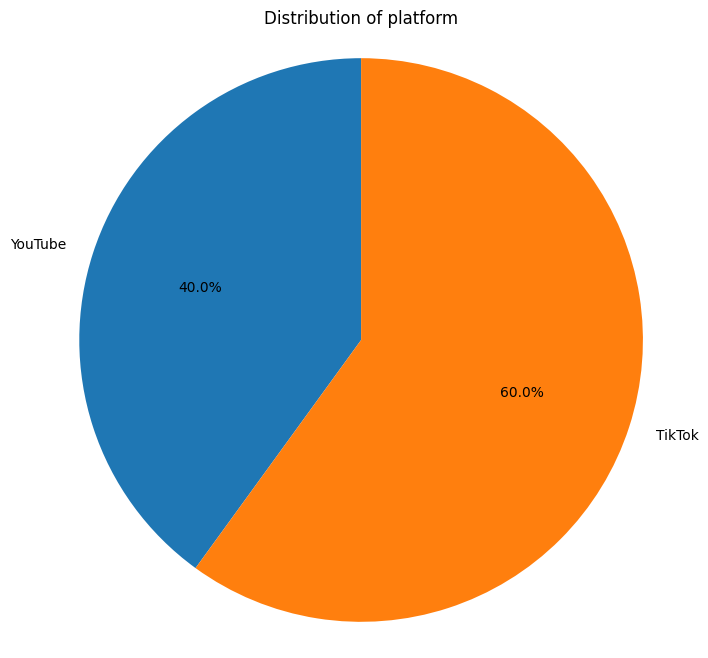

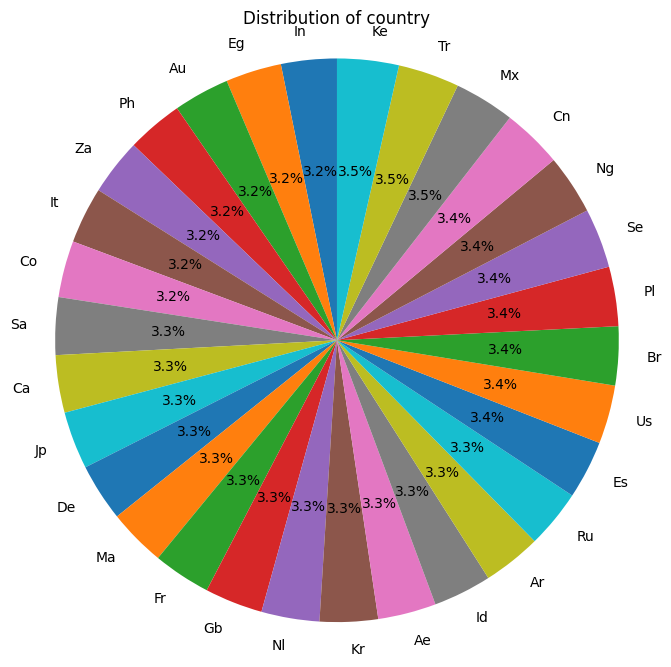

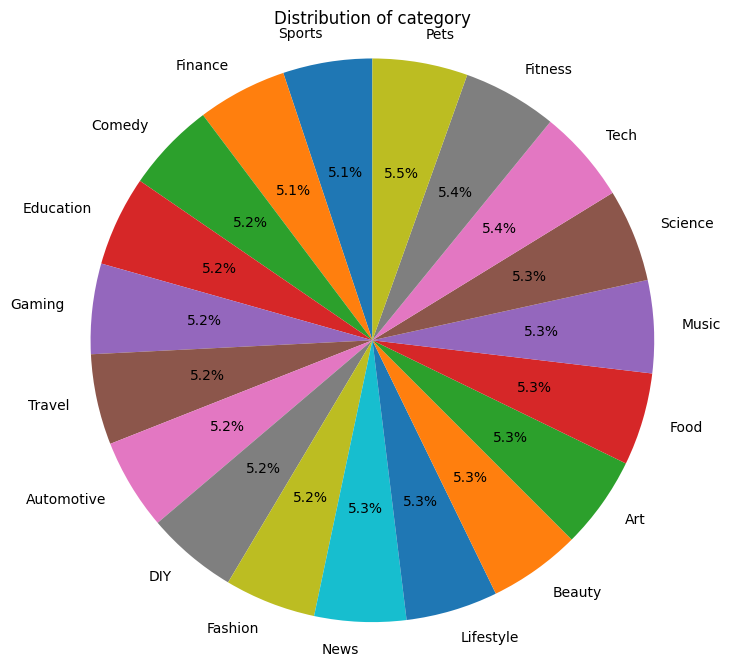

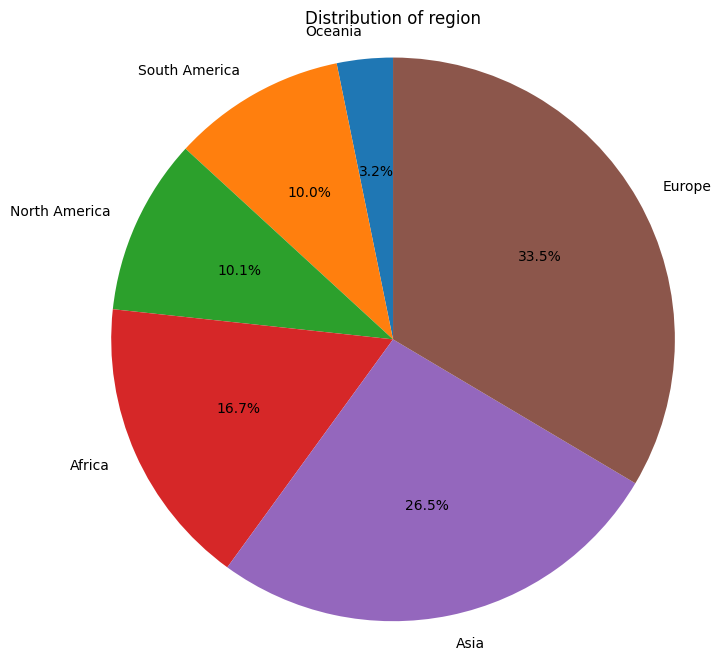

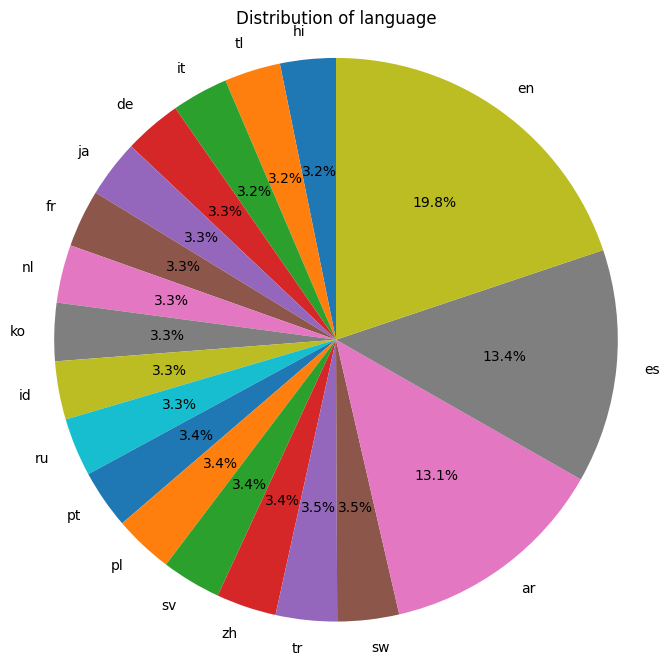

--- End of EDA ---



In [175]:
# EDA the dataset (shorts_vs_tiktok)
# Objective: To explore the dataset and understand the distribution of key metrics across different platforms and countries.
# What you'll do: Use descriptive statistics and visualizations to analyze the distribution of views, likes, comments, shares, and completion rates across YouTube Shorts and TikTok. You can create histograms, box plots, and scatter plots to visualize these distributions.
# Expected outcome: A comprehensive overview of how engagement metrics vary between the two platforms and across different countries.
print("Exploratory Data Analysis (EDA) of the shorts_vs_tiktok dataset:")
# Change format of date columns
shorts_vs_tiktok = shorts_vs_tiktok.with_columns([
    pl.col("publish_date_approx").str.strptime(pl.Date, "%Y-%m-%d"),
    pl.col("year_month").str.strptime(pl.Date, "%Y-%m")
])
print("Data types after conversion:")
display(shorts_vs_tiktok.schema)

def piechart_sns(dataset, column):
    df = dataset[column].value_counts().sort('count')
    labels = df[column].to_list()
    values = df['count'].to_list()
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Distribution of {column}')
    plt.show()
    
piechart_sns(shorts_vs_tiktok, 'platform')
piechart_sns(shorts_vs_tiktok, 'country')
piechart_sns(shorts_vs_tiktok, 'category')
piechart_sns(shorts_vs_tiktok, 'region')
piechart_sns(shorts_vs_tiktok, 'language')



print("--- End of EDA ---\n")